#CNN ON CIFAR 100 DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading datasets
# We are going to work with CIFAR 10 dataset which will have 10 classes in the output

from keras.datasets import cifar100

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

it means the training data has 50000 training images and each image has dimension 32*32 with 3 RGB channels

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
#our output data is 2 dimensional

In [10]:
y_train.ndim

2

In [11]:
y_train[: 5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
#now we will convert,y data from 2 dimensional to 1 dim..

y_train = y_train.flatten()
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
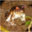

In [13]:
X_train[0]

#Data Exploration

In [14]:
my_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship","truck"]
print(my_classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
def plot_image(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(my_classes[y[index]])


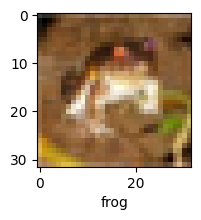

In [16]:
plot_image(X_train, y_train, 0)

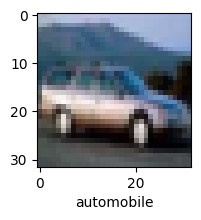

In [17]:
plot_image(X_train, y_train, 4)

In [18]:
#performing normalization

X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

#now we will build ANN model

In [20]:
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)), #input layer
    layers.Dense(3000, activation = 'relu'), #hidden layer
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')  #output layer..10 is the no of classes we have
])

ANN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy']

)
ANN.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.3075 - loss: 1.9240
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4211 - loss: 1.6405
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 90ms/step - accuracy: 0.4487 - loss: 1.5552
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 92ms/step - accuracy: 0.4794 - loss: 1.4858
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 89ms/step - accuracy: 0.4960 - loss: 1.4377


In [21]:
#Accuracy of ANN on test data

ANN.evaluate(X_test, y_test) #to determine how well your model generalizes to new data, providing you with key metrics like loss and accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4700 - loss: 1.4894


[1.4955840110778809, 0.46650001406669617]

#CNN MODEL

In [31]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam


# Defining the CNN model
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)
CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

layers.Dropout(0.5)

CNN.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.3524 - loss: 1.7489
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.5826 - loss: 1.1725
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.6488 - loss: 1.0045
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6927 - loss: 0.8899
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7174 - loss: 0.8228


In [32]:
# Evaluating the model on test data
test_loss, test_acc = CNN.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6887 - loss: 0.9104
Test accuracy: 0.6866000294685364
Test loss: 0.9189762473106384


In [36]:
# Making predictions on the test set
predictions = CNN.predict(X_test)

print("Predictions for the first 5 images: ", predictions[:5])


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Predictions for the first 5 images:  [[2.3297161e-02 3.1259349e-03 2.0181015e-02 3.4848523e-01 9.1413166e-03
  1.3724260e-01 5.3166491e-03 9.6037276e-03 3.9608866e-01 4.7517665e-02]
 [1.3690251e-02 3.2955807e-01 2.2049008e-04 3.3645517e-06 5.9019708e-06
  6.0341955e-07 3.1028944e-06 4.5857196e-06 6.5324980e-01 3.2638512e-03]
 [3.6639009e-02 6.6856986e-01 2.9150522e-03 2.9960547e-03 9.9322211e-04
  7.3769671e-04 1.6183194e-03 3.9226934e-03 1.8331008e-01 9.8297961e-02]
 [4.9469480e-01 5.6011560e-03 2.4030952e-02 2.2250928e-03 3.0582756e-02
  9.6362237e-05 2.2917315e-04 6.3129846e-04 4.4031796e-01 1.5902673e-03]
 [2.5508878e-05 1.8192808e-05 3.1693399e-02 3.8354412e-02 1.4389026e-01
  1.5328935e-03 7.8436178e-01 2.1595645e-06 1.0145459e-04 1.9969917e-05]]


Each value in this vector corresponds to the model's confidence for each of the 10 classes. For example:
for first image:
The model is 34.85% confident that the image belongs to the 4th class (index 3, as Python uses 0-based indexing).
It is 39.61% confident that the image belongs to the 9th class (index 8).
Other classes have much lower probabilities.